# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d18/172a2fdce873f964749851f7565d3b3b189fad6bce734e5a5eaf082d.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Lahore, Punjab, Pakistan**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(18,'172a2fdce873f964749851f7565d3b3b189fad6bce734e5a5eaf082d')

ModuleNotFoundError: No module named 'mplleaflet'

In [2]:
%matplotlib notebook

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d18/172a2fdce873f964749851f7565d3b3b189fad6bce734e5a5eaf082d.csv')

FileNotFoundError: [Errno 2] File b'data/C2A2_data/BinnedCsvs_d18/172a2fdce873f964749851f7565d3b3b189fad6bce734e5a5eaf082d.csv' does not exist: b'data/C2A2_data/BinnedCsvs_d18/172a2fdce873f964749851f7565d3b3b189fad6bce734e5a5eaf082d.csv'

In [10]:
df.head()

,ID,Date,Element,Data_Value
0,CHM00052602,2009-06-08,TMIN,61
1,INM00042475,2012-05-29,TMAX,453
2,IN005120501,2011-12-26,TMIN,94
3,PKM00041598,2009-06-26,TMIN,275
4,CHM00052754,2007-05-07,TMAX,145


In [11]:
df = df.sort('Date')[df.Date <= '2014-12-31']
df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,ID,Date,Element,Data_Value
85598,IN019070100,2005-01-01,TMAX,210
88191,CHM00052418,2005-01-01,TMAX,-39
88003,IN019040100,2005-01-01,TMAX,220
87986,CHM00056021,2005-01-01,TMAX,41
87985,CHM00056021,2005-01-01,TMIN,-114


In [14]:
df_TMAX = df[df.Element == 'TMAX']
df_TMIN = df[df.Element == 'TMIN']

In [15]:
df_Tmax = df_TMAX.groupby('Date').agg({'Data_Value':max})
df_Tmin = df_TMIN.groupby('Date').agg({'Data_Value':min})

In [22]:
df_Tmax = df_Tmax.reset_index()
df_Tmin = df_Tmin.reset_index()

In [24]:
df_Tmin['Date']=pd.to_datetime(df_Tmin['Date'])
df_Tmax['Date']=pd.to_datetime(df_Tmax['Date'])
df_Tmin['Date']=df_Tmin['Date'].dt.strftime('%m-%d')
df_Tmax['Date']=df_Tmax['Date'].dt.strftime('%m-%d')

In [26]:
df_Tmin=df_Tmin.groupby('Date').agg({'Data_Value':min})
df_Tmax=df_Tmax.groupby('Date').agg({'Data_Value':max})
##clean 02-29
df_Tmin=df_Tmin.drop('02-29')
df_Tmax=df_Tmax.drop('02-29')
###use the index for 1-365
df_Tmin=df_Tmin.reset_index()
df_Tmax=df_Tmax.reset_index()

In [27]:
df2 = pd.read_csv('data/C2A2_data/BinnedCsvs_d18/172a2fdce873f964749851f7565d3b3b189fad6bce734e5a5eaf082d.csv')

In [28]:
df2=df2[df2['Date']>='2015-01-01'].sort('Date')
df2015Tmax=df2[df2['Element']=='TMAX']
df2015Tmin=df2[df2['Element']=='TMIN']
df2015Tmax=df2015Tmax.groupby('Date').agg({'Data_Value':max})
df2015Tmin=df2015Tmin.groupby('Date').agg({'Data_Value':min})
df2015Tmax=df2015Tmax.reset_index()
df2015Tmin=df2015Tmin.reset_index()
df2015Tmin['Date']=pd.to_datetime(df2015Tmin['Date'])
df2015Tmax['Date']=pd.to_datetime(df2015Tmax['Date'])
df2015Tmin['Date']=df2015Tmin['Date'].dt.strftime('%m-%d')
df2015Tmax['Date']=df2015Tmax['Date'].dt.strftime('%m-%d')

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [32]:
Tmax=pd.merge(df2015Tmax,df_Tmax,how='inner',left_on='Date',right_on='Date')
Tmin=pd.merge(df2015Tmin,df_Tmin,how='inner',left_on='Date',right_on='Date')    

In [34]:
Tmax=Tmax.rename(columns={'Data_Value_x':'2015max','Data_Value_y':'05-14max'})
Tmin=Tmin.rename(columns={'Data_Value_x':'2015min','Data_Value_y':'05-14min'})

In [36]:
Tmax=Tmax[Tmax['2015max']>Tmax['05-14max']]
Tmin=Tmin[Tmin['2015min']<Tmin['05-14min']]
Tmax

,Date,2015max,05-14max
7,01-08,322,319
9,01-10,312,308
12,01-13,316,313
46,02-16,355,350
52,02-22,385,378
53,02-23,378,374
56,02-26,380,378
258,09-16,420,415
259,09-17,411,410
289,10-17,406,400


In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


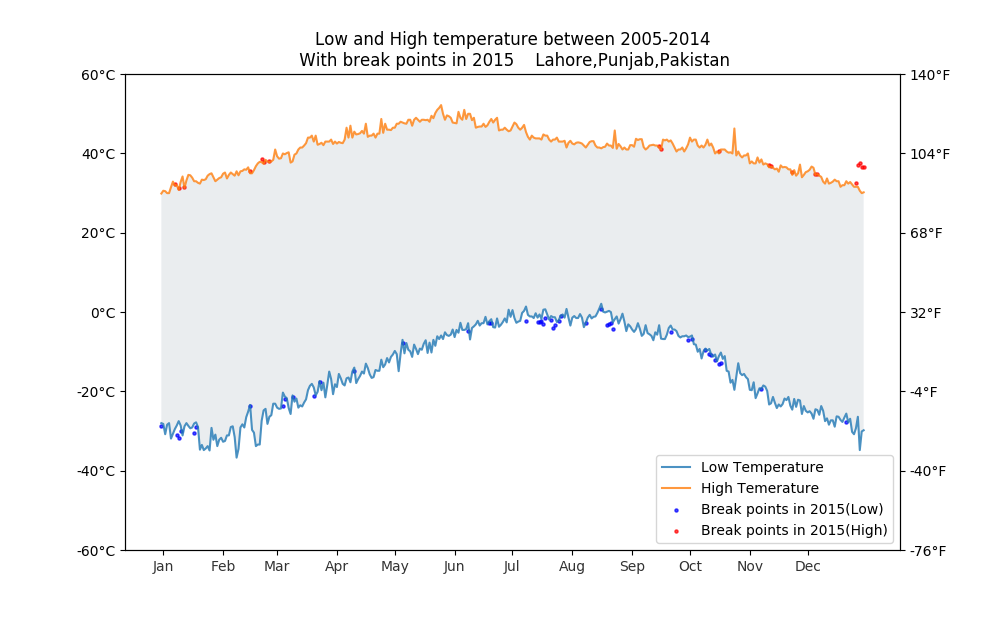

In [41]:
fig=plt.figure(figsize=(10,6.18))
ax=fig.add_subplot(111)
ax.plot(df_Tmin['Data_Value'],'-',df_Tmax['Data_Value'],'-',alpha=0.8)
plt.gca().fill_between(range(365),df_Tmin['Data_Value'],df_Tmax['Data_Value'],facecolor='lightslategrey',alpha=0.15,label='_nolegend_')
plt.scatter(Tmin.index,Tmin['2015min'],s=5,c='blue',alpha=0.7)
plt.scatter(Tmax.index,Tmax['2015max'],s=5,c='red',alpha=0.7)


plt.legend(['Low Temperature','High Temerature','Break points in 2015(Low)','Break points in 2015(High)'])


In [43]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
DayOfMonth=[1,32,60,91,121,152,182,213,244,274,305,335]
plt.xticks(DayOfMonth)
plt.xticks(DayOfMonth,month,alpha=0.8)


([<matplotlib.axis.XTick at 0x7f716f2919b0>,
 <a list of 12 Text xticklabel objects>)

In [44]:
pos,labels=plt.yticks()
newpos=[]
newpos2=[]
for i in pos:
    newpos.append(str(int(i/10))+u'\N{DEGREE SIGN}'+'C')
    newpos2.append(str(int(i/10*1.8+32))+u'\N{DEGREE SIGN}'+'F')
#+u'\N{DEGREE SIGN}'+'F'

plt.yticks(pos,newpos)


([<matplotlib.axis.YTick at 0x7f716f276f28>,
 <a list of 7 Text yticklabel objects>)

In [45]:
ax2 = ax.twinx()
ax2.get_yticks()
newpos3=[]
for i in pos:
    newpos3.append(int(i/10*1.8+32))
newpos3
ax2.set_yticks(newpos3, minor=False)

In [46]:
newpos3

[-76, -40, -4, 32, 68, 104, 140]

In [47]:
pospos,labelsss=plt.yticks()
plt.yticks(newpos3,newpos2)


([<matplotlib.axis.YTick at 0x7f716f71d320>,
 <a list of 7 Text yticklabel objects>)

In [49]:
plt.title('Low and High temperature between 2005-2014\n With break points in 2015    Lahore,Punjab,Pakistan')